In [33]:
from utils.loader import USAGE, BENEFITS
from usage_process import average_utilization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
usage = USAGE
benefits = BENEFITS

In [35]:
benefit_mean_usage = usage[['BenefitID', 'UsageFrequency']].groupby('BenefitID').mean('UsageFrequency').reset_index()

In [36]:
benefit_mean_usage = pd.merge(benefit_mean_usage, benefits[['BenefitID', 'BenefitSubType']], on = 'BenefitID')

<BarContainer object of 30 artists>

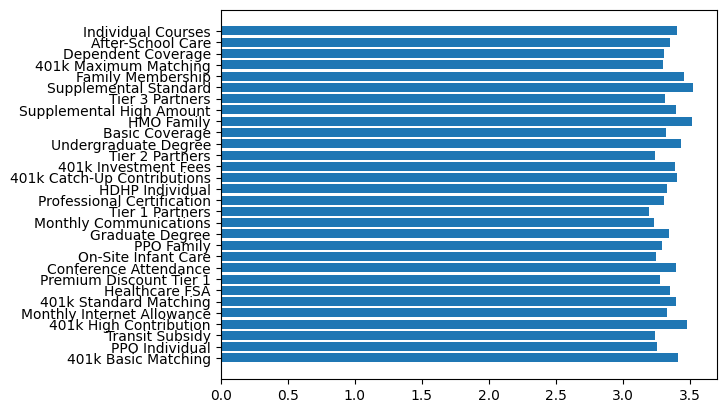

In [37]:
plt.barh(benefit_mean_usage['BenefitSubType'], benefit_mean_usage['UsageFrequency'])

In [38]:
usage['LastUsedDate'] = pd.to_datetime(usage['LastUsedDate'])
usage['LastUsedMonth'] = usage['LastUsedDate'].dt.month

In [39]:
month_mean_usage = usage[['LastUsedMonth', 'UsageFrequency']].groupby('LastUsedMonth').mean('UsageFrequency')

In [40]:
months = pd.DataFrame(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], columns=['Month'])
months.index = range(1, 13)
pd.Categorical(months['Month'], categories=months, ordered=True)
month_mean_usage = month_mean_usage.merge(months, left_index=True, right_index=True)

In [41]:
month_mean_usage

,UsageFrequency,Month
LastUsedMonth,,
1,3.317142,January
2,3.353280,February
3,3.430887,March
4,3.346117,April
5,3.385928,May
6,3.381827,June
7,3.324636,July
8,3.322952,August
9,3.248967,September


Text(0, 0.5, 'Average Utilization')

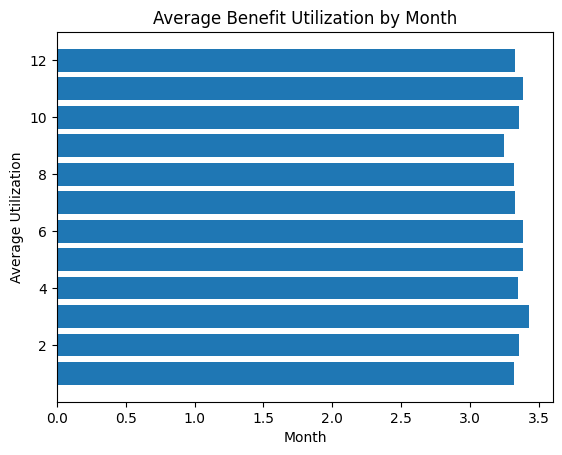

In [42]:

plt.barh(month_mean_usage.index, month_mean_usage['UsageFrequency'])
plt.title('Average Benefit Utilization by Month')
plt.xlabel('Month')
plt.ylabel('Average Utilization')

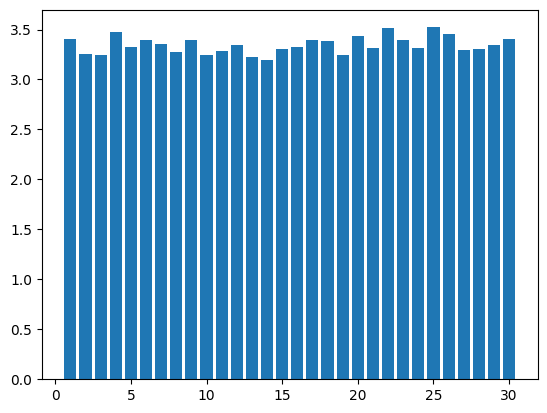

In [43]:
average_usage = average_utilization('BenefitID', usage)

In [54]:
average_usage = average_usage.sort_values(by='UsageFrequency', ascending=False).reset_index()
average_usage = average_usage.merge(benefits, on = 'BenefitID')


In [55]:
average_usage

,index,BenefitID,UsageFrequency,BenefitType_x,BenefitSubType_x,BenefitCost_x,BenefitType_y,BenefitSubType_y,BenefitCost_y
0,29,25,3.522459,Life Insurance,Supplemental Standard,774.91,Life Insurance,Supplemental Standard,774.91
1,28,22,3.517710,Health Insurance,HMO Family,624.00,Health Insurance,HMO Family,624.00
2,27,4,3.476651,Retirement Plan,401k High Contribution,261.44,Retirement Plan,401k High Contribution,261.44
3,26,26,3.457410,Gym Membership,Family Membership,519.66,Gym Membership,Family Membership,519.66
4,25,20,3.433125,Tuition Reimbursement,Undergraduate Degree,489.96,Tuition Reimbursement,Undergraduate Degree,489.96
5,24,1,3.409416,Retirement Plan,401k Basic Matching,876.21,Retirement Plan,401k Basic Matching,876.21
6,23,30,3.405390,Tuition Reimbursement,Individual Courses,723.73,Tuition Reimbursement,Individual Courses,723.73
7,22,17,3.400000,Retirement Plan,401k Catch-Up Contributions,509.65,Retirement Plan,401k Catch-Up Contributions,509.65
8,21,9,3.397490,Professional Development,Conference Attendance,850.00,Professional Development,Conference Attendance,850.00
9,20,23,3.393637,Life Insurance,Supplemental High Amount,969.28,Life Insurance,Supplemental High Amount,969.28


,EmployeeID,BenefitID,UsageFrequency,LastUsedDate,LastUsedMonth,BenefitType,BenefitSubType,BenefitCost
0,4245,25,2,2023-09-01,9,Life Insurance,Supplemental Standard,774.91
1,220,20,4,2024-05-03,5,Tuition Reimbursement,Undergraduate Degree,489.96
2,4716,24,4,2024-02-10,2,Gym Membership,Tier 3 Partners,780.78
3,3971,26,0,2023-09-15,9,Gym Membership,Family Membership,519.66
4,1048,24,1,2024-05-29,5,Gym Membership,Tier 3 Partners,780.78
...,...,...,...,...,...,...,...,...
49995,4288,20,4,2024-04-30,4,Tuition Reimbursement,Undergraduate Degree,489.96
49996,4627,30,0,2024-06-08,6,Tuition Reimbursement,Individual Courses,723.73
49997,1993,10,2,2023-09-25,9,Childcare,On-Site Infant Care,915.48
49998,3782,26,0,2024-01-06,1,Gym Membership,Family Membership,519.66


,BenefitType,UsageFrequency
7,Professional Development,3.397490
8,Retirement Plan,3.396033
6,Life Insurance,3.386244
10,Tuition Reimbursement,3.374012
3,Flexible Spending Account,3.352212
5,Health Insurance,3.349340
9,Technology Stipend,3.327830
4,Gym Membership,3.303270
1,Childcare,3.297691
11,Wellness Programs,3.280000


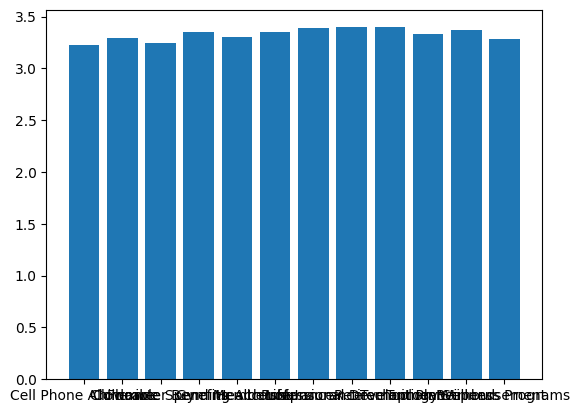

In [62]:
average_utilization('BenefitType', usage.merge(benefits, on= 'BenefitID')).reset_index().sort_values(by='UsageFrequency', ascending=False)

<BarContainer object of 30 artists>

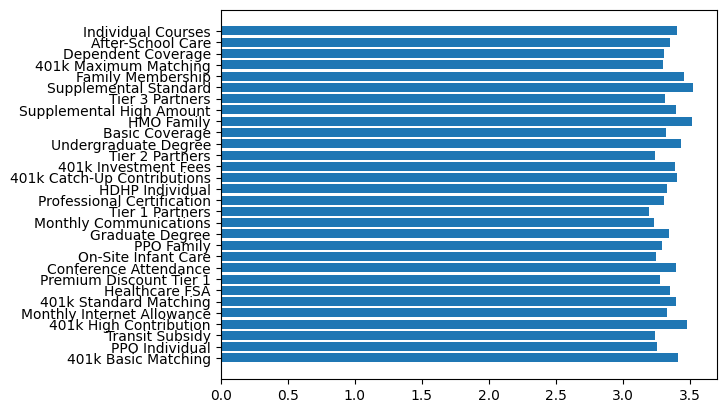

In [46]:
plt.barh(benefit_mean_usage['BenefitSubType'], benefit_mean_usage['UsageFrequency'])

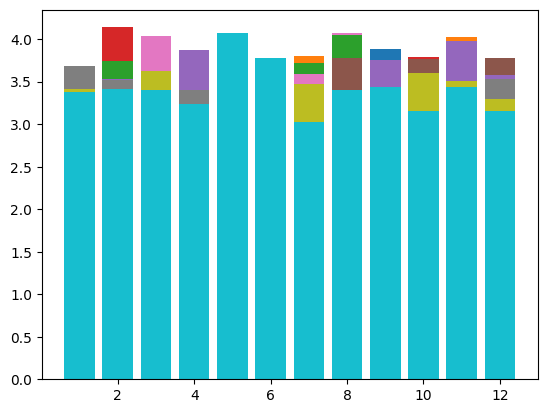

In [47]:
df_list=[]
for Benefit in usage['BenefitID'].sort_values().unique():
    df_list.append({'BenefitID': Benefit, 'BenefitSubType': benefits[benefits['BenefitID']==Benefit]['BenefitSubType'].to_string(index=False), 'data': average_utilization('LastUsedMonth', usage[usage['BenefitID']==Benefit])})

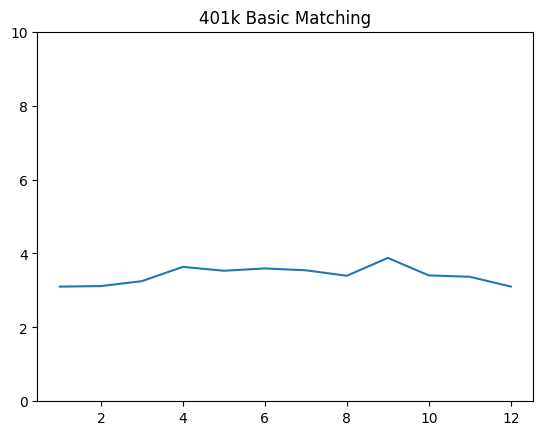

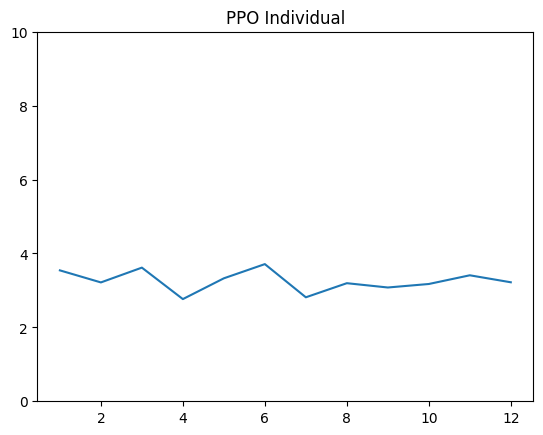

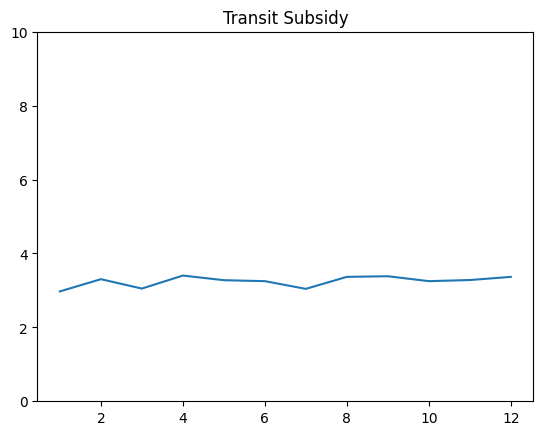

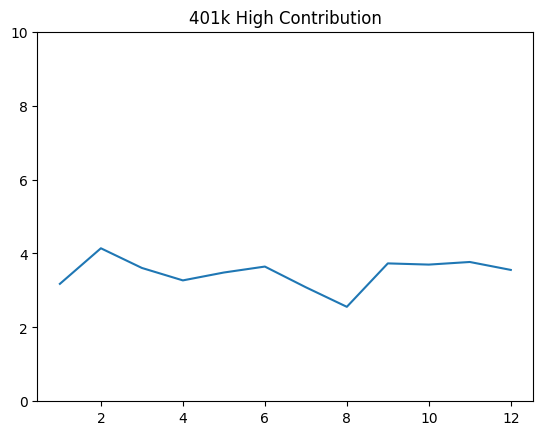

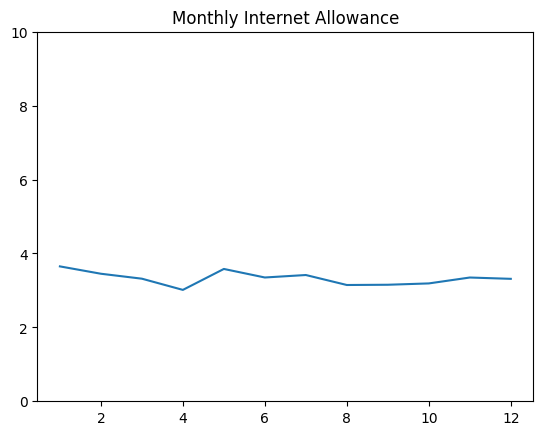

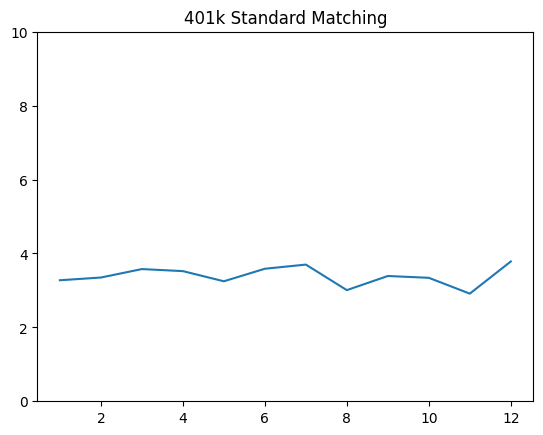

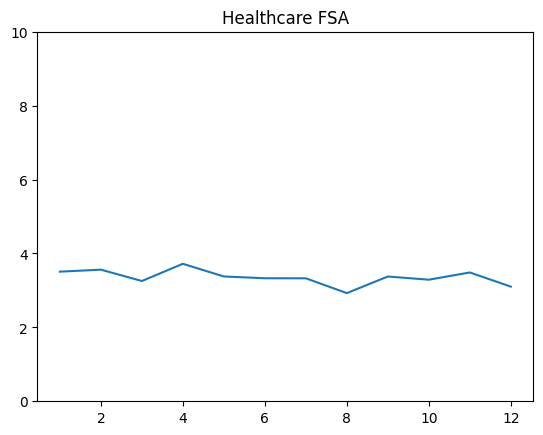

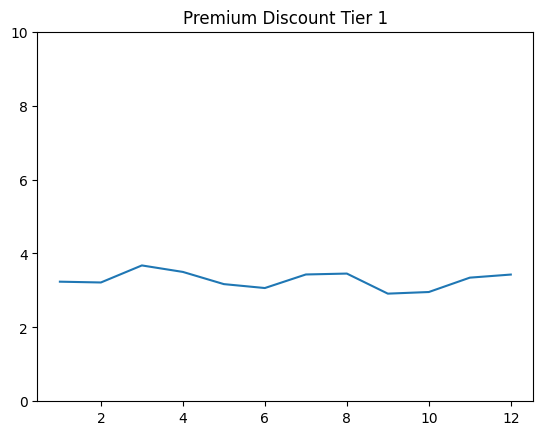

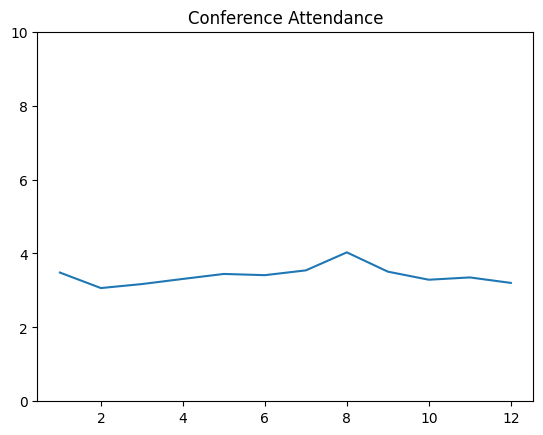

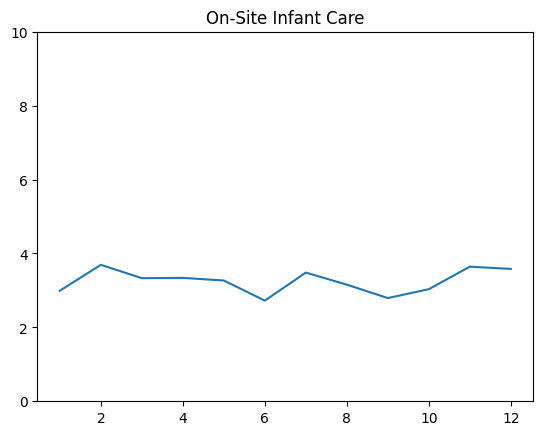

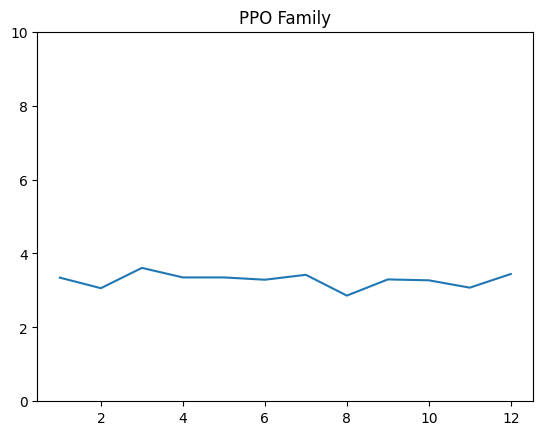

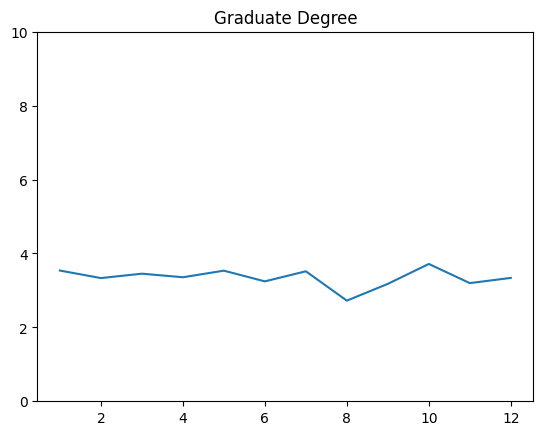

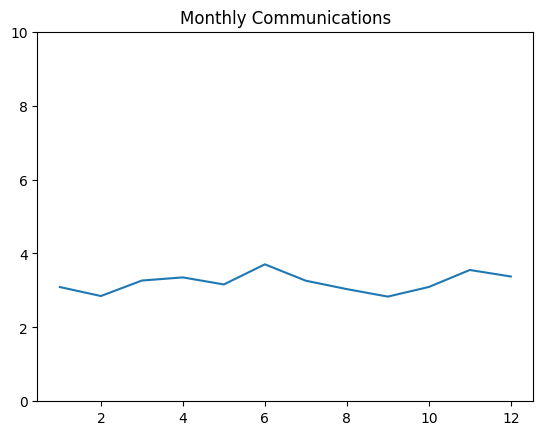

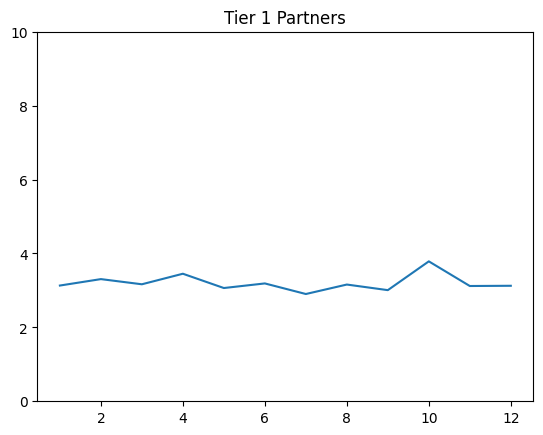

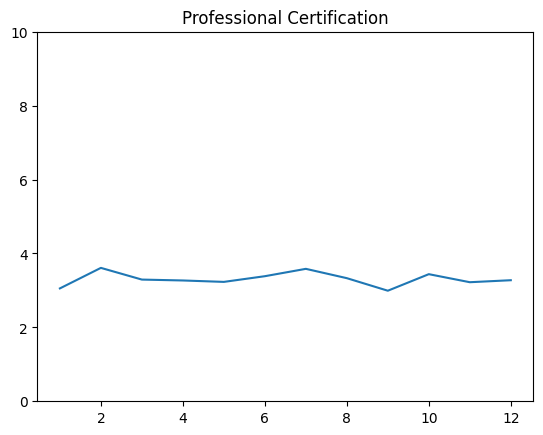

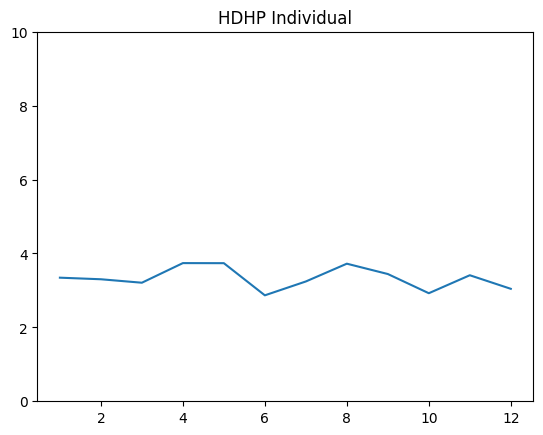

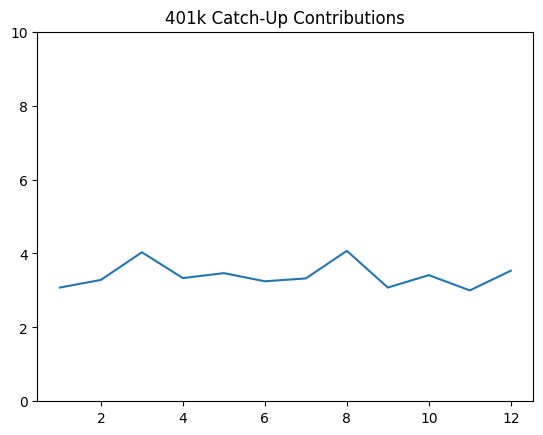

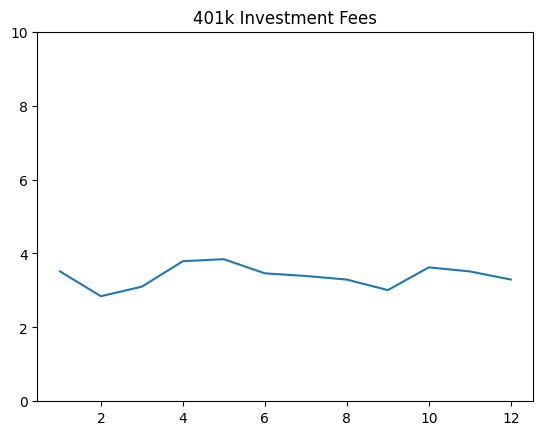

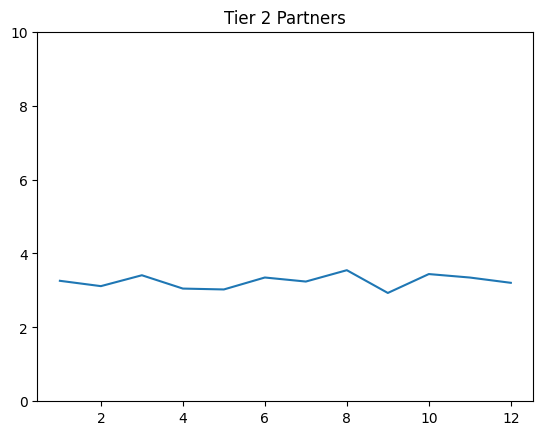

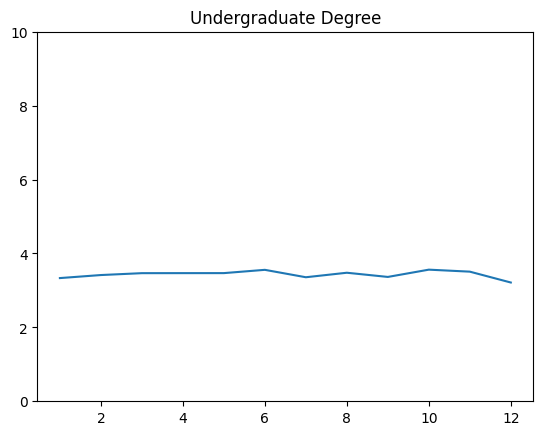

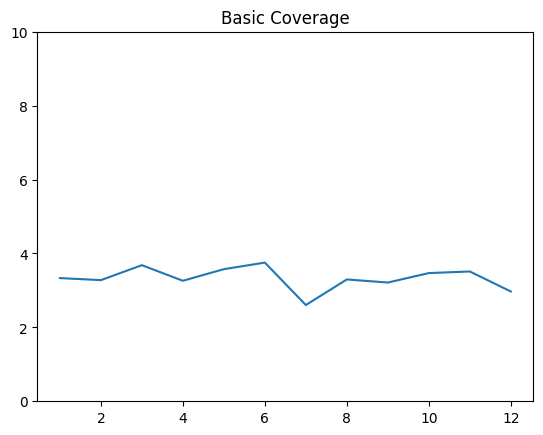

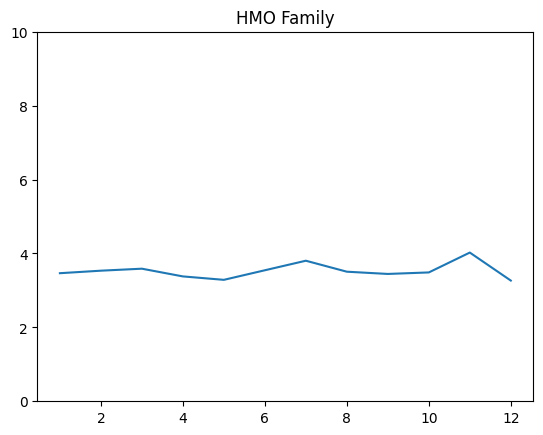

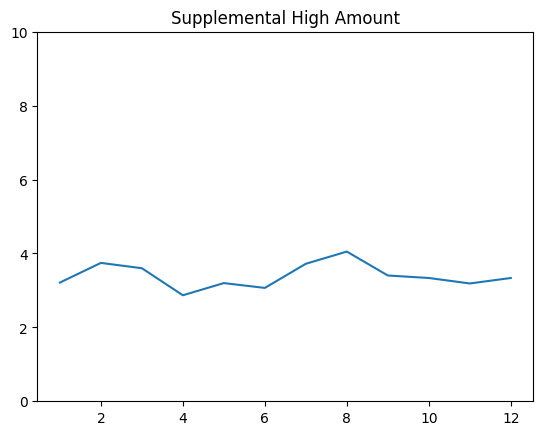

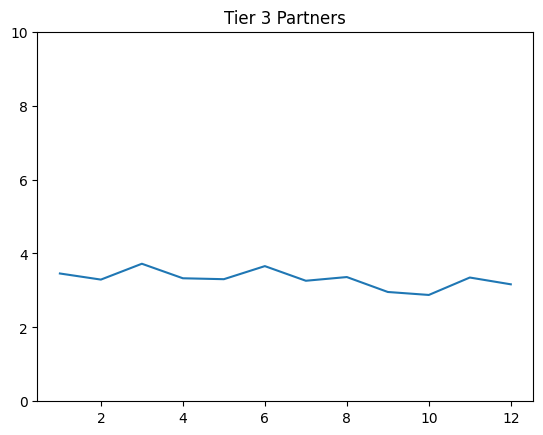

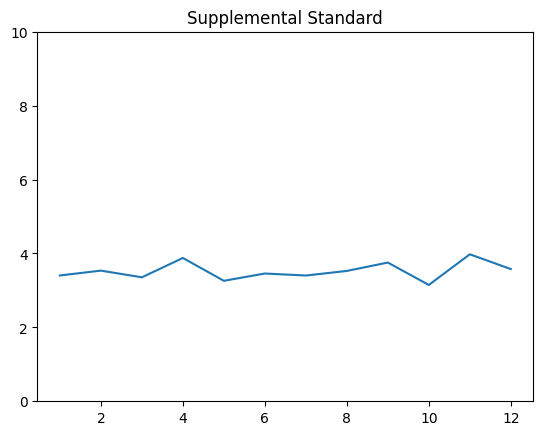

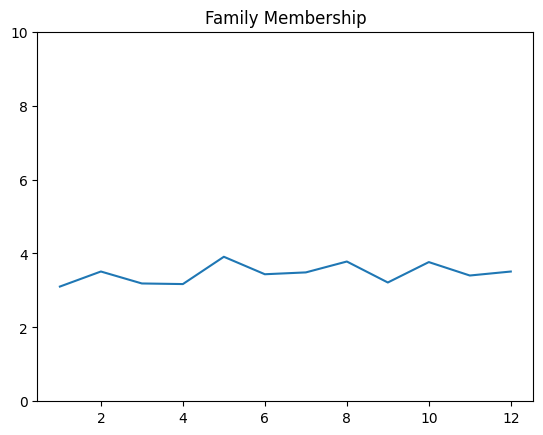

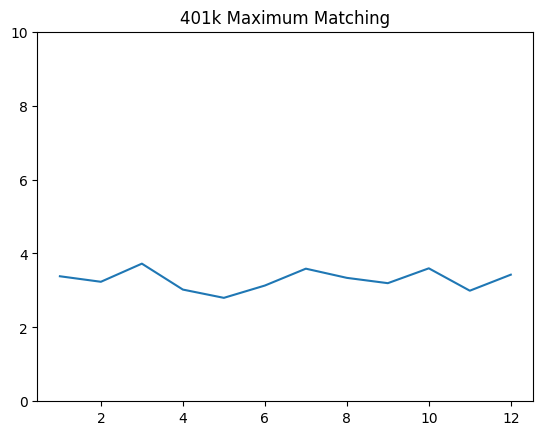

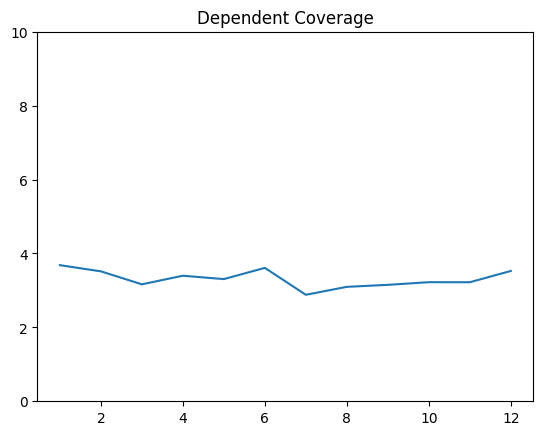

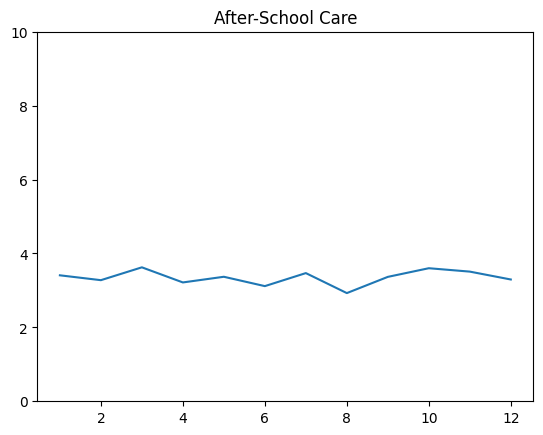

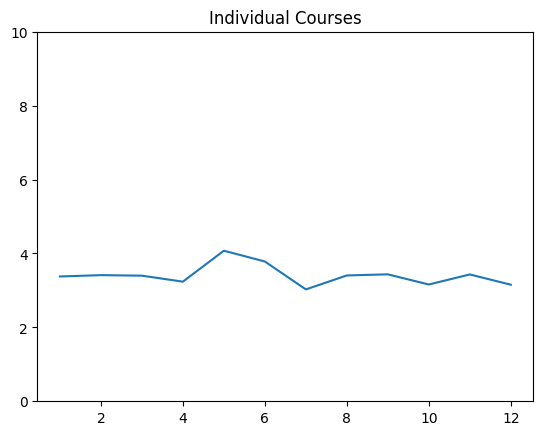

In [48]:
for BenefitID in df_list:
    plt.plot(BenefitID['data'])
    plt.title(BenefitID['BenefitSubType'])
    plt.ylim(0,10)
    plt.show()

In [49]:
cleaned_data = pd.read_csv('encoded_phase1_cleaned_data.csv')

In [50]:
conditions = [
    (cleaned_data['UsageFrequency'] >= 7),
    (cleaned_data['UsageFrequency'] >= 3) & (cleaned_data['UsageFrequency'] < 7),
    (cleaned_data['UsageFrequency'] >= 0) & (cleaned_data['UsageFrequency'] < 3)
]
choices = [
    'High',
    'Medium',
    'Low'
]
cleaned_data['UsageCategory'] = np.select(conditions, choices, default='Fail')

In [51]:
cleaned_data.to_csv('phase1_with_Usage_Categories.csv', index=False)


In [52]:
cleaned_data_encoded_usage = pd.concat([cleaned_data, pd.get_dummies(cleaned_data['UsageCategory'], prefix='Usage_')], axis=1)


In [53]:
cleaned_data_encoded_usage.to_csv('phase1_usage_encoded.csv', index=False)